In [1]:
import tarfile
import zipfile
import shutil
import random
import os
import cv2
import pathlib
import numpy as np
import pandas as pd

import tensorflow as tf
import matplotlib.pyplot as plt
from numpy.random import seed
from google.colab import drive
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras import mixed_precision
from tensorflow.keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet import ResNet101

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import top_k_accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
random_seed = 42

seed(random_seed)
tf.random.set_seed(random_seed)
random.seed(random_seed)

#policy = mixed_precision.Policy('mixed_float16')
#mixed_precision.set_global_policy(policy)
#print('Compute dtype: %s' % policy.compute_dtype)
#print('Variable dtype: %s' % policy.variable_dtype)

In [3]:
drive.mount('/content/gdrive', force_remount=True)
!tar --extract --verbose --file='/content/gdrive/MyDrive/Progetto_VIPM_personale/dataset/new_train_set.tar'
!tar --extract --verbose --file='/content/gdrive/MyDrive/Progetto_VIPM/dataset/val.tar'
with zipfile.ZipFile("/content/gdrive/MyDrive/Progetto_VIPM/dataset/val_degraded.zip","r") as zip_ref:
    zip_ref.extractall()

Output streaming troncato alle ultime 5000 righe.
./val_set/val_003453.jpg
./val_set/val_005719.jpg
./val_set/val_001622.jpg
./val_set/val_002497.jpg
./val_set/val_011151.jpg
./val_set/val_007639.jpg
./val_set/val_005917.jpg
./val_set/val_010592.jpg
./val_set/val_001806.jpg
./val_set/val_005160.jpg
./val_set/val_011428.jpg
./val_set/val_006375.jpg
./val_set/val_011387.jpg
./val_set/val_007022.jpg
./val_set/val_006082.jpg
./val_set/val_002553.jpg
./val_set/val_006272.jpg
./val_set/val_002359.jpg
./val_set/val_007099.jpg
./val_set/val_006264.jpg
./val_set/val_005217.jpg
./val_set/val_008900.jpg
./val_set/val_005329.jpg
./val_set/val_009168.jpg
./val_set/val_004077.jpg
./val_set/val_010864.jpg
./val_set/val_007423.jpg
./val_set/val_006787.jpg
./val_set/val_001671.jpg
./val_set/val_002147.jpg
./val_set/val_009798.jpg
./val_set/val_011954.jpg
./val_set/val_005692.jpg
./val_set/val_005568.jpg
./val_set/val_002920.jpg
./val_set/val_005490.jpg
./val_set/val_005175.jpg
./val_set/val_005083.jpg


In [ ]:
csv_train_file = pd.read_csv("/content/gdrive/MyDrive/Progetto_VIPM/annot/new_train_info.csv", dtype=str)
csv_train_file.columns = ['filename', 'label']
parent_dir = "new_train_set/"
labels = csv_train_file['label']

# divido le immagini in sottocartelle in base alla classe
for label in labels:
    path = os.path.join(parent_dir, label)
    os.makedirs(path, exist_ok=True)    
for _, row in csv_train_file.iterrows():
    label = row['label']
    path = os.path.join(parent_dir, row['filename'])
    img_name = os.path.split(path)[-1]
    new_path = os.path.join(parent_dir, label, img_name)
    print(new_path)
    shutil.copy(path, new_path)

Output streaming troncato alle ultime 5000 righe.
new_train_set/170/new_aug-170-_82_4257681.jpg
new_train_set/170/new_aug-170-_83_8987260.jpg
new_train_set/170/new_aug-170-_84_133930.jpg
new_train_set/170/new_aug-170-_85_2024164.jpg
new_train_set/170/new_aug-170-_86_5453615.jpg
new_train_set/170/new_aug-170-_87_3420783.jpg
new_train_set/170/new_aug-170-_88_6841804.jpg
new_train_set/170/new_aug-170-_89_1478944.jpg
new_train_set/170/new_aug-170-_8_6383002.jpg
new_train_set/170/new_aug-170-_90_6268877.jpg
new_train_set/170/new_aug-170-_91_1256851.jpg
new_train_set/170/new_aug-170-_92_1427779.jpg
new_train_set/170/new_aug-170-_93_3004325.jpg
new_train_set/170/new_aug-170-_94_5153235.jpg
new_train_set/170/new_aug-170-_95_935538.jpg
new_train_set/170/new_aug-170-_96_9366575.jpg
new_train_set/170/new_aug-170-_97_1262464.jpg
new_train_set/170/new_aug-170-_98_6717965.jpg
new_train_set/170/new_aug-170-_99_6880908.jpg
new_train_set/170/new_aug-170-_9_8561314.jpg
new_train_set/107/new_aug-107-_0_6

In [4]:
csv_test_clean_file = pd.read_csv("/content/gdrive/MyDrive/Progetto_VIPM/annot/val_info.csv", dtype=str)
csv_test_clean_file.columns = ['filename', 'label']
parent_dir = "val_set/"
labels = csv_test_clean_file['label']

# divido le immagini in sottocartelle in base alla classe
for label in labels:
    path = os.path.join(parent_dir, label)
    os.makedirs(path, exist_ok=True)    
for _, row in csv_test_clean_file.iterrows():
    label = row['label']
    path = os.path.join(parent_dir, row['filename'])
    img_name = os.path.split(path)[-1]
    new_path = os.path.join(parent_dir, label, img_name)
    print(new_path)
    shutil.copy(path, new_path)

Output streaming troncato alle ultime 5000 righe.
val_set/16/val_005256.jpg
val_set/119/val_005257.jpg
val_set/68/val_005258.jpg
val_set/130/val_005259.jpg
val_set/43/val_005260.jpg
val_set/197/val_005261.jpg
val_set/101/val_005262.jpg
val_set/55/val_005263.jpg
val_set/62/val_005264.jpg
val_set/49/val_005265.jpg
val_set/17/val_005266.jpg
val_set/204/val_005267.jpg
val_set/181/val_005268.jpg
val_set/122/val_005269.jpg
val_set/170/val_005270.jpg
val_set/66/val_005271.jpg
val_set/48/val_005272.jpg
val_set/96/val_005273.jpg
val_set/86/val_005274.jpg
val_set/144/val_005275.jpg
val_set/99/val_005276.jpg
val_set/4/val_005277.jpg
val_set/30/val_005278.jpg
val_set/177/val_005279.jpg
val_set/182/val_005280.jpg
val_set/201/val_005281.jpg
val_set/168/val_005282.jpg
val_set/187/val_005283.jpg
val_set/130/val_005284.jpg
val_set/30/val_005285.jpg
val_set/145/val_005286.jpg
val_set/153/val_005287.jpg
val_set/180/val_005288.jpg
val_set/160/val_005289.jpg
val_set/37/val_005290.jpg
val_set/52/val_005291.

In [ ]:
csv_test_deg_file = pd.read_csv("/content/gdrive/MyDrive/Progetto_VIPM/annot/val_info.csv", dtype=str)
csv_test_deg_file.columns = ['filename', 'label']
parent_dir = "val_set_degraded/"
labels = csv_test_deg_file['label']

# divido le immagini in sottocartelle in base alla classe
for label in labels:
    path = os.path.join(parent_dir, label)
    os.makedirs(path, exist_ok=True)    
for _, row in csv_test_deg_file.iterrows():
    label = row['label']
    path = os.path.join(parent_dir, row['filename'])
    img_name = os.path.split(path)[-1]
    new_path = os.path.join(parent_dir, label, img_name)
    print(new_path)
    shutil.copy(path, new_path)

Output streaming troncato alle ultime 5000 righe.
val_set_degraded/16/val_005256.jpg
val_set_degraded/119/val_005257.jpg
val_set_degraded/68/val_005258.jpg
val_set_degraded/130/val_005259.jpg
val_set_degraded/43/val_005260.jpg
val_set_degraded/197/val_005261.jpg
val_set_degraded/101/val_005262.jpg
val_set_degraded/55/val_005263.jpg
val_set_degraded/62/val_005264.jpg
val_set_degraded/49/val_005265.jpg
val_set_degraded/17/val_005266.jpg
val_set_degraded/204/val_005267.jpg
val_set_degraded/181/val_005268.jpg
val_set_degraded/122/val_005269.jpg
val_set_degraded/170/val_005270.jpg
val_set_degraded/66/val_005271.jpg
val_set_degraded/48/val_005272.jpg
val_set_degraded/96/val_005273.jpg
val_set_degraded/86/val_005274.jpg
val_set_degraded/144/val_005275.jpg
val_set_degraded/99/val_005276.jpg
val_set_degraded/4/val_005277.jpg
val_set_degraded/30/val_005278.jpg
val_set_degraded/177/val_005279.jpg
val_set_degraded/182/val_005280.jpg
val_set_degraded/201/val_005281.jpg
val_set_degraded/168/val_0052

In [ ]:
train_data_dir = pathlib.Path('new_train_set/')
seed_train_validation = 42 # deve essere lo stesso per train_ds e val_ds
shuffle_value = True
validation_split = 0.2
batch_size = 128

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    labels="inferred",
    label_mode="categorical",
    validation_split=validation_split,
    subset="training",
    seed=seed_train_validation,
    image_size=(224,224),
    batch_size=batch_size,
    shuffle=shuffle_value,
    seed=random_seed)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    labels="inferred",
    label_mode="categorical",
    validation_split=validation_split,
    subset="validation",
    seed=seed_train_validation,
    image_size=(224,224),
    batch_size=batch_size,
    shuffle=shuffle_value,
    seed=random_seed)

Found 250999 files belonging to 251 classes.
Using 200800 files for training.
Found 250999 files belonging to 251 classes.
Using 50199 files for validation.


In [5]:
test_clean_data_dir = pathlib.Path('val_set/')
#shuffle_value = True
shuffle_value = False
batch_size = 128

test_clean_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_clean_data_dir,
    labels="inferred",
    label_mode="categorical",
    subset=None,
    image_size=(224,224),
    batch_size=batch_size,
    shuffle=shuffle_value,
    seed=random_seed)

Found 11993 files belonging to 251 classes.


In [ ]:
test_deg_data_dir = pathlib.Path('val_set_degraded/')
shuffle_value = True

test_deg_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_deg_data_dir,
    labels="inferred",
    label_mode="categorical",
    subset=None,
    image_size=(224,224),
    batch_size=batch_size,
    shuffle=shuffle_value,
    seed=random_seed)

Found 11993 files belonging to 251 classes.


In [6]:
def preprocess(images, labels):
  return tf.keras.applications.resnet.preprocess_input(images), labels

#train_ds = train_ds.map(preprocess)
#val_ds = val_ds.map(preprocess)
test_clean_ds = test_clean_ds.map(preprocess)
#test_deg_ds = test_deg_ds.map(preprocess)

# Creazione modello

In [8]:
checkpoint_filepath = '/content/gdrive/MyDrive/Progetto_VIPM/models/best_model_resnet101_augmented.h5'
loaded_model = keras.models.load_model(checkpoint_filepath)
loaded_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [9]:
for layer in loaded_model.layers:
  layer.trainable=False

feat_extractor_model = Model(inputs=loaded_model.input, 
                             outputs=loaded_model.get_layer('flatten').output)
feat_extractor_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [10]:
features_test_clean = feat_extractor_model.predict(test_clean_ds)
print(features_test_clean.shape)

94/94 [==============================] - 72s 637ms/step
(11993, 2048)


In [11]:
features_test_clean[0]

array([0.16927268, 0.21076554, 0.93923867, ..., 0.35305724, 0.0404035 ,
       0.        ], dtype=float32)

In [12]:
#with open('/content/gdrive/My Drive/Progetto_VIPM_personale/features_test_clean_resnet101.npy', 'wb') as output:
#    np.save(output, features_test_clean)

In [ ]:
#with open('/content/gdrive/My Drive/Progetto_VIPM/features_test_clean_resnet101.npy', 'rb') as input:
#     features_test_clean = np.load(input)

In [13]:
from tensorflow.keras.preprocessing import image
img_path = "/content/gdrive/MyDrive/Progetto_VIPM_personale/torta-cioccolato.jpg"
img = image.load_img(img_path, target_size=(224,224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = tf.keras.applications.resnet.preprocess_input(img)

(-0.5, 223.5, 223.5, -0.5)

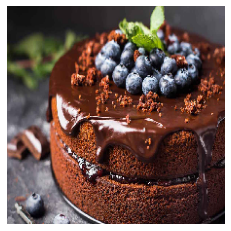

In [34]:
im_query = image.load_img(img_path, target_size=(224,224))
plt.imshow(im_query)
plt.axis('off')

In [14]:
features_new_image = feat_extractor_model.predict(img)
print(features_new_image.shape)

1/1 [==============================] - 2s 2s/step
(1, 2048)


In [15]:
features_new_image

array([[0.25116336, 1.0988697 , 1.9439301 , ..., 0.1485063 , 0.15367948,
        0.22451974]], dtype=float32)

In [16]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(n_neighbors=5, 
                       algorithm='brute',
                       metric='minkowski',
                       p=2)
knn.fit(features_test_clean)

NearestNeighbors(algorithm='brute')

In [17]:
print(knn.kneighbors(features_new_image))

(array([[32.820396, 34.23018 , 34.538452, 34.57892 , 35.390324]],
      dtype=float32), array([[ 6673, 10309,   941, 10313, 10337]]))


In [18]:
from keras.utils import dataset_utils

file_paths, labels, class_names = dataset_utils.index_directory(directory="val_set/", 
                                                                labels="inferred", 
                                                                formats="jpg",
                                                                shuffle=False,
                                                                seed=42)

Found 11993 files belonging to 251 classes.


In [19]:
file_paths[6673], file_paths[10309], file_paths[941]

('val_set/225/val_011954.jpg',
 'val_set/68/val_003480.jpg',
 'val_set/115/val_008073.jpg')

In [31]:
im1 = "val_set/225/val_011954.jpg"
im2 = "val_set/68/val_003480.jpg"
im3 = "val_set/115/val_008073.jpg"

(-0.5, 223.5, 223.5, -0.5)

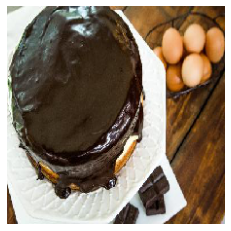

In [28]:
im1 = image.load_img(im1, target_size=(224,224))
plt.imshow(im1)
plt.axis('off')

(-0.5, 223.5, 223.5, -0.5)

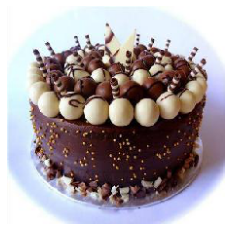

In [32]:
im2 = image.load_img(im2, target_size=(224,224))
plt.imshow(im2)
plt.axis('off')

(-0.5, 223.5, 223.5, -0.5)

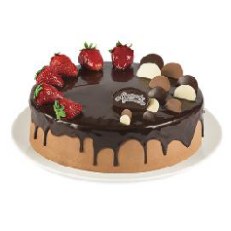

In [33]:
im3 = image.load_img(im3, target_size=(224,224))
plt.imshow(im3)
plt.axis('off')